<a href="https://colab.research.google.com/github/lobasfs/-ML-/blob/main/Classification_IC50_LobasFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc

In [ ]:
data = pd.read_csv('Обработанный.csv')
data.head()

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,2,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Columns: 195 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(88)
memory usage: 1.4 MB


In [ ]:
df = data.copy()

In [ ]:
df['target'] = (df['IC50, mM'] > df['IC50, mM'].median()).astype(int)

In [ ]:
# Разделяем данных на признаки и целевой столбец
X = df.drop(['IC50, mM', 'SI','target'], axis=1)
y = df['target']
X

,"CC50, mM",MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,175.482382,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,340.300,384.350449,...,0,0,0,0,0,0,0,0,3,0
1,5.402819,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,340.300,388.381750,...,0,0,0,0,0,0,0,0,3,0
2,161.142320,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,388.344,446.458903,...,2,0,0,0,0,0,0,0,3,0
3,107.855654,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,352.311,398.366099,...,0,0,0,0,0,0,0,0,4,0
4,139.270991,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,424.377,466.334799,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,34.999650,12.934891,12.934891,0.048029,-0.476142,0.382752,49.133333,414.542,380.270,414.240624,...,0,0,0,0,0,0,0,0,0,0
945,33.999415,13.635345,13.635345,0.030329,-0.699355,0.369425,44.542857,485.621,446.309,485.277738,...,0,0,0,0,0,0,0,0,0,0
946,33.999458,13.991690,13.991690,0.026535,-0.650790,0.284923,41.973684,545.742,502.398,545.281109,...,0,1,0,0,0,0,0,0,0,0
947,32.999644,13.830180,13.830180,0.146522,-1.408652,0.381559,39.000000,522.635,480.299,522.282883,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Проводим стандартизацию признаков
scales = StandardScaler()
X_scaled = scales.fit_transform(X)
X_scaled

array([[-0.65068397, -1.7555751 , -1.7555751 , ..., -0.27782192,
         2.2416977 , -0.08620324],
       [-0.92139519, -2.09860733, -2.09860733, ..., -0.27782192,
         2.2416977 , -0.08620324],
       [-0.67350867, -2.50270017, -2.50270017, ..., -0.27782192,
         2.2416977 , -0.08620324],
       ...,
       [-0.87587866,  0.939063  ,  0.939063  , ..., -0.27782192,
        -0.1711996 , -0.08620324],
       [-0.87747004,  0.89014984,  0.89014984, ..., -0.27782192,
        -0.1711996 , -0.08620324],
       [-0.77082806,  0.75407414,  0.75407414, ..., -0.27782192,
        -0.1711996 , -0.08620324]])

In [ ]:
# Отбор 60 лучших признаков по mutual_info, для понижения размерности ускорения обучения
selector = SelectKBest(score_func=mutual_info_regression, k=60)
X_selected = selector.fit_transform(X_scaled, y)
selected_feature_names = X.columns[selector.get_support()]
selected_feature_names

Index(['CC50, mM', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinEStateIndex',
       'qed', 'SPS', 'HeavyAtomMolWt', 'MaxPartialCharge', 'MinPartialCharge',
       'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan3',
       'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO',
       'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW',
       'AvgIpc', 'Chi0', 'Chi1', 'Chi1n', 'Chi2n', 'HallKierAlpha', 'Ipc',
       'Kappa3', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA3',
       'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SlogP_VSA2',
       'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'TPSA', 'EState_VSA1',
       'EState_VSA10', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4',
       'EState_VSA8', 'VSA_EState1', 'VSA_EState2', 'VSA_EState3',
       'VSA_EState5', 'VSA_EState7', 'VSA_EState8', 'NHOHCount', 'fr_ester'],
      dtype='object')

In [ ]:
# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
# Возьмем четыре модели, обычную логистическую регрессию,RandomForest, XGBoost, KNN
# и их разные гиперпараметры для подбора
models = {
    "LogisticRegression": (
        LogisticRegression(max_iter=5000),
        {
            "C": [0.01, 0.1, 1.0, 10.0]
        }
    ),
    "RandomForest": (
        RandomForestClassifier(random_state=42),
        {
            "n_estimators": [100, 200],
            "max_depth": [5, 10, 15],
            "min_samples_split": [2, 5]
        }
    ),
    "XGBoost": (
        XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        {
            "n_estimators": [100, 200],
            "max_depth": [3, 6, 10],
            "learning_rate": [0.01, 0.1, 0.3],
            "subsample": [0.8, 1.0]
        }
    ),
    "KNN": (
        KNeighborsClassifier(),
        {
            "n_neighbors": [3, 5, 7, 11],
            "weights": ["uniform", "distance"]
        }
    )
}

In [ ]:
results = []
for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=5, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })
results_df = pd.DataFrame(results)
results_df

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:44:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Best Params,Accuracy,ROC AUC
0,LogisticRegression,{'C': 0.1},0.752632,0.833391
1,RandomForest,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.789474,0.850217
2,XGBoost,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.789474,0.861378
3,KNN,"{'n_neighbors': 11, 'weights': 'distance'}",0.721053,0.775527


In [ ]:
xgb = XGBClassifier(learning_rate = 0.01, max_depth=3, n_estimators=200, subsample=0.8 , use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb.fit(X_train, y_train)

y_xgb_pred = xgb.predict(X_test)

# Предсказание классов и вероятностей
xgb_proba = xgb.predict_proba(X_test)[:, 1]

# Метрики
print("Accuracy:", accuracy_score(y_test, y_xgb_pred))
print("Precision:", precision_score(y_test, y_xgb_pred))
print("Recall:", recall_score(y_test, y_xgb_pred))
print("F1-score:", f1_score(y_test, y_xgb_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb_proba))
print("\nПолный отчёт для XGBoost:\n", classification_report(y_test, y_xgb_pred))

Accuracy: 0.7578947368421053
Precision: 0.6818181818181818
Recall: 0.7692307692307693
F1-score: 0.7228915662650602
ROC AUC: 0.859489468864469

Полный отчёт для XGBoost:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       112
           1       0.68      0.77      0.72        78

    accuracy                           0.76       190
   macro avg       0.75      0.76      0.75       190
weighted avg       0.77      0.76      0.76       190



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:35:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


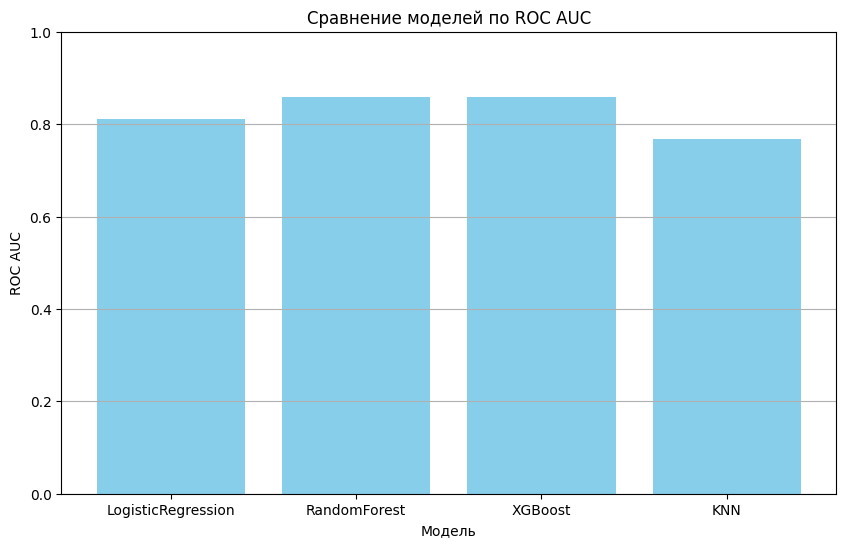

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(results_df['Model'], results_df['ROC AUC'], color='skyblue')
plt.xlabel('Модель')
plt.ylabel('ROC AUC')
plt.title('Сравнение моделей по ROC AUC')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

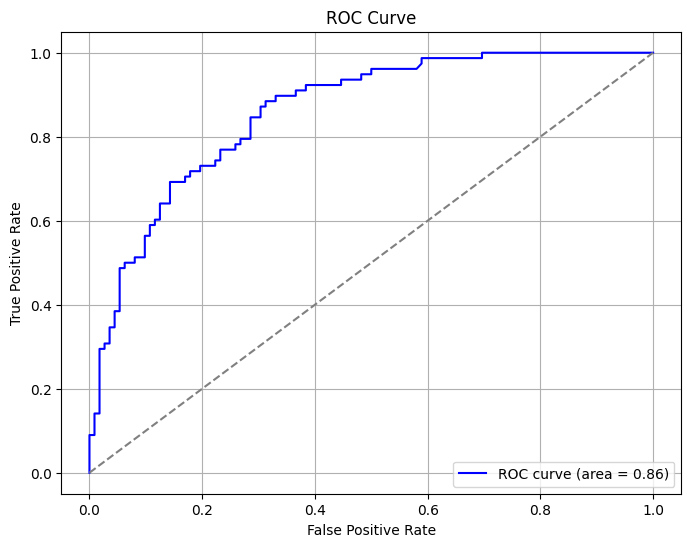

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, xgb_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()